<a href="https://colab.research.google.com/github/gmauricio-toledo/mandelbrot/blob/main/Mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class Iteracion:

    def __init__(self,c,num_iteraciones):
        self.c = c
        self.num_iteraciones = num_iteraciones
        self.iteraciones = range(self.num_iteraciones)
        self.orbita = [complex(0,0)]
        for i in self.iteraciones:
            self.orbita.append(self.__p(self.orbita[-1]))
        self.orbita = np.array(self.orbita)

    def __p(self,z):
        return z**2+self.c

    def graficar(self,fname='orbita.gif'):
        def update(n):
            # ax.clear()
            ax.axhline(0,color='gray')
            ax.axvline(0,color='gray')
            x, y = self.orbita[n].real, self.orbita[n].imag
            fig.suptitle(f"c={self.c}\nIteración: {n}, z={complex(round(x,3),round(y,3))}")
            if np.abs(x) > 11 or np.abs(y) > 11:
                fig.suptitle("Se escapó")
            else:
                ax.scatter([x], [y], s=45, color='black')
        fig, ax = plt.subplots(figsize=(7,5))
        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_xticks([-10,-5,0,5,10])
        ax.set_yticks([-10,-5,0,5,10])
        ani = animation.FuncAnimation(fig, update, frames=self.iteraciones, interval=1000)
        ani.save(fname, writer='pillow')
        plt.close(fig)

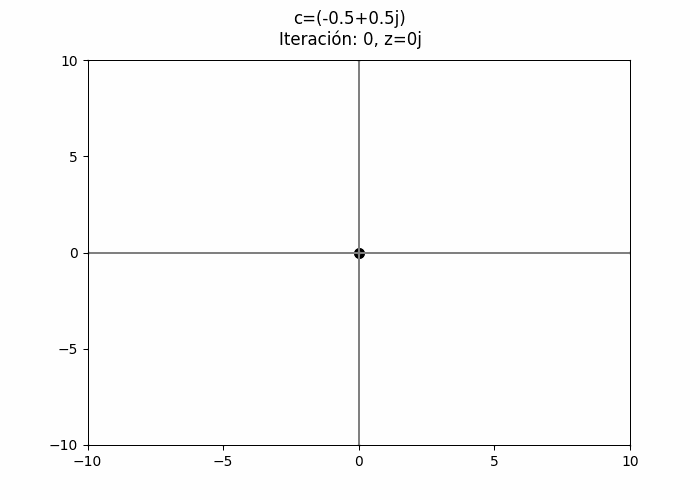

In [22]:
from IPython.display import Image

c = complex(-0.5,0.5)
num_iteraciones = 10

iteracion = Iteracion(c=c,
                    num_iteraciones=num_iteraciones)
iteracion.graficar()
Image(open('orbita.gif','rb').read())

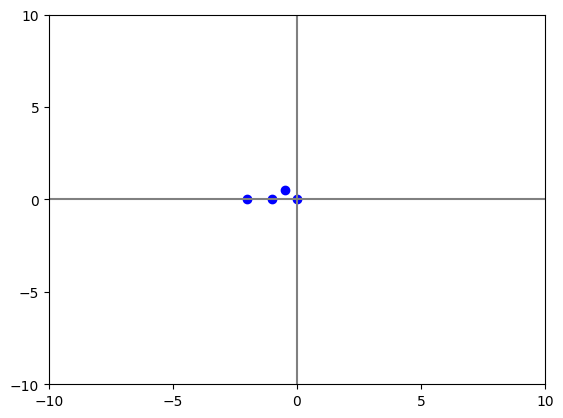

In [26]:
cs = [0+0j,-1+0j,-2+0j,-0.5+0.5j]

plt.figure()
plt.scatter([c.real for c in cs],[c.imag for c in cs],color='blue')
plt.axhline(0,color='gray')
plt.axvline(0,color='gray')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xticks([-10,-5,0,5,10])
plt.yticks([-10,-5,0,5,10])
plt.show()